In [9]:
%load_ext cudf.pandas

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%%cudf.pandas.profile
#synthetize some time series data
rng = pd.date_range("2023-01-01","2023-02-01", periods=1_000_000)
df = pd.DataFrame({
    "id": np.random.randint(len(rng)),
    "a": np.random.rand(len(rng)),
    "b": np.random.rand(len(rng)),
}, index=rng)

# filter for data between 9:00 am and 4:00 pm
df = df.iloc[rng.indexer_between_time("09:30","16:00")]

# group and compute on the data
results = df.groupby("id").mean()

                                                                                                                   
                                             Total time elapsed: 0.279 seconds                                     
                                           8 GPU function calls in 0.060 seconds                                   
                                           1 CPU function calls in 0.023 seconds                                   
                                                                                                                   
                                                           Stats                                                   
                                                                                                                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                      ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ date_range                    │ 1          │ 0.039       │ 0.039       │ 0          │ 0.000       │ 0.000       │
│ Index.__len__                 │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DataFrame                     │ 1          │ 0.007       │ 0.007       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.indexer_betwee… │ 0          │ 0.000       │ 0.000       │ 1          │ 0.023       │ 0.023       │
│ _LocationIndexer.__getitem__  │ 1          │ 0.005       │ 0.005       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.groupby             │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ GroupBy.mean                  │ 1          │ 0.008       │ 0.008       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- DatetimeIndex.indexer_between_time

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=491193;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

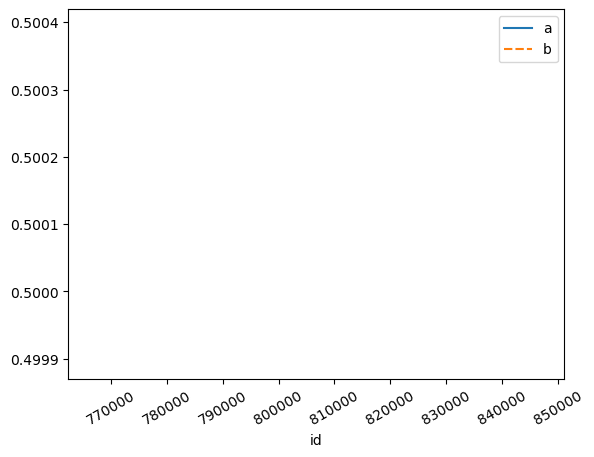

In [13]:
_ = sns.lineplot(results)
_ = plt.xticks(rotation=30)